In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Задача 12
Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [2]:
features = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',\
'Magnesium','Total phenols','Flavanoids',\
'Nonflavanoid phenols','Proanthocyanins','Color intensity', \
'Hue','OD280/OD315 of diluted wines','Proline']

data = pd.read_table(filepath_or_buffer = \
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=',', names = features)

fixed_data = data.drop(labels = 'Type', axis = 1, inplace = False)
fixed_data['Type'] = data['Type']

fixed_data.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(fixed_data.drop(labels='Type', axis = 1), fixed_data['Type'])

$\textbf{Норма Чебышева (максимум модуля)}$

In [6]:
neighbours_factor = range(1,10)
knn_train_result_cheb = []
knn_test_result_cheb = []
error_cheb = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors=neighbours, metric = 'chebyshev').fit(X_train, y_train)
    knn_train_result_cheb.append(knn.score(X_train, y_train))
    knn_test_result_cheb.append(knn.score(X_test, y_test))
    error_cheb.append((knn.predict(X_test) != y_test).sum())

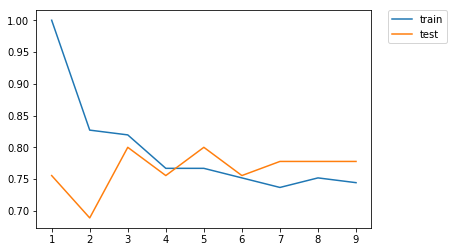

In [7]:
plt.plot(neighbours_factor, knn_train_result_cheb, label='train');
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

plt.plot(neighbours_factor, knn_test_result_cheb, label='test');
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.);

$\textbf{Евклидова норма}$

In [8]:
neighbours_factor = range(1,10)
knn_train_result_eucl = []
knn_test_result_eucl = []
error_eucl = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors=neighbours, metric = 'euclidean').fit(X_train, y_train)
    knn_train_result_eucl.append(knn.score(X_train, y_train))
    knn_test_result_eucl.append(knn.score(X_test, y_test))
    error_eucl.append((knn.predict(X_test) != y_test).sum())

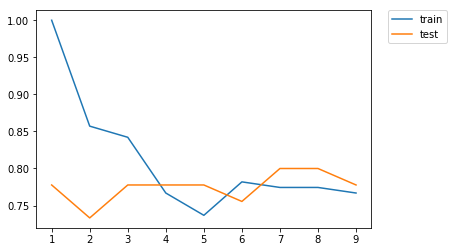

In [9]:
plt.plot(neighbours_factor, knn_train_result_eucl, label = 'train');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.plot(neighbours_factor, knn_test_result_eucl, label = 'test');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

$\textbf{Сумма модулей}$

In [11]:
neighbours_factor = range(1,10)
knn_train_result_manh = []
knn_test_result_manh = []
error_manh = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors = neighbours,metric= 'manhattan').fit(X_train, y_train)
    knn_train_result_manh.append(knn.score(X_train, y_train))
    knn_test_result_manh.append(knn.score(X_test, y_test))
    error_manh.append((knn.predict(X_test) != y_test).sum())

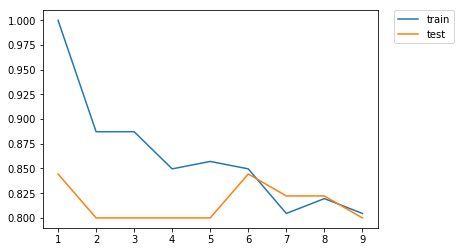

In [12]:
plt.plot(neighbours_factor, knn_train_result_manh, label = 'train');
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

plt.plot(neighbours_factor, knn_test_result_manh, label = 'test');
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

$\textbf{Task 3}$

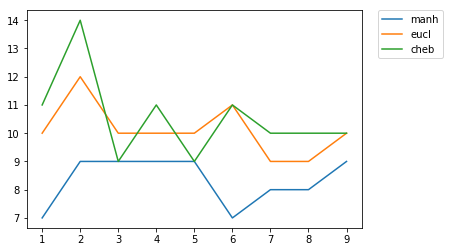

In [15]:
plt.plot(neighbours_factor, error_manh, label = 'manh');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.plot(neighbours_factor, error_eucl, label = 'eucl');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.plot(neighbours_factor, error_cheb, label = 'cheb');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);